In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

In [2]:
import pickle

In [3]:
from typing import List, Dict, Any, Tuple

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [5]:
import colorcet

In [6]:
import glob
from tqdm import tqdm
import json

In [7]:
from bertopic import BERTopic

In [8]:
# Set up LaTeX fonts
#plt.style.use(['no-latex'])
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']

In [9]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding_2.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding: Dict[str, Dict] = pickle.load(file)

In [110]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding_full_document.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding_8k: Dict[str, Dict] = pickle.load(file)

In [10]:
documents: List = list(doc2embedding.keys())
embeddings: np.array = np.array(list(doc2embedding.values()))

In [122]:
documents_8k: List = [
    doc for doc in list(doc2embedding_8k.keys())
    if doc in documents
]
embeddings_8k: np.array = np.array(
    [
        emb for doc, emb in doc2embedding_8k.items()
        if doc in documents
    ]
)

In [11]:
# to get categories, read JSON files
json_files: List = [
    json_file_id.split('/')[-1][:-5]
    for json_file_id in glob.glob('../data/json_files/*.json')
]


doc2json: Dict[str, Dict] = {}

for doc in tqdm(json_files):
    # open the file in read mode
    file_path = "../data/json_files/" + doc + ".json"
    with open(file_path, "r", encoding='utf-8',) as file:
        # Load the JSON data
        doc2json[doc] = json.load(file)

  0%|          | 0/17486 [00:00<?, ?it/s]

100%|██████████| 17486/17486 [00:00<00:00, 77198.92it/s]


In [12]:
summaries: List[str] = [
    doc2json[doc]["tldr"]
    for doc in documents
]

In [126]:
topic_sentences: List[str] = [
    ' '.join(doc2json[doc]["topics"])
    for doc in documents
]

topic_sentences_8k: List[str] = [
    ' '.join(doc2json[doc]["topics"])
    for doc in documents_8k
]

In [56]:
topic_model = BERTopic(
    verbose=True,
    min_topic_size=75,
    #nr_topics="auto",
)

In [119]:
topics, probs = topic_model.fit_transform(
    topic_sentences, 
    embeddings,
)

topic_set = set(topics)

color_set = sns.color_palette(
    colorcet.glasbey,
    n_colors=len(topic_set)
)

topic2color = {
    topic: color
    for topic, color in zip(topic_set, color_set)
}

topic2color[-1] = (0.6, 0.6, 0.6)

topic_names = topic_model.get_topic_info()['Name'].values

topic2name = {
    int(t_name[:t_name.find('_')]): t_name
    for t_name in topic_names
}

2024-05-22 17:09:38,866 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-22 17:09:49,609 - BERTopic - Dimensionality - Completed ✓
2024-05-22 17:09:49,610 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-22 17:09:50,865 - BERTopic - Cluster - Completed ✓
2024-05-22 17:09:50,872 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-22 17:09:51,077 - BERTopic - Representation - Completed ✓


In [121]:
type(topic_sentences), type(embeddings_8k)

(list, list)

In [127]:
topics_8k, probs_8k = topic_model.fit_transform(
    topic_sentences_8k, 
    embeddings_8k,
)

topic_set_8k = set(topics_8k)

color_set_8k = sns.color_palette(
    colorcet.glasbey,
    n_colors=len(topic_set_8k)
)

topic2color = {
    topic: color
    for topic, color in zip(topic_set_8k, color_set_8k)
}

topic2color[-1] = (0.6, 0.6, 0.6)

topic_names = topic_model.get_topic_info()['Name'].values

topic2name = {
    int(t_name[:t_name.find('_')]): t_name
    for t_name in topic_names
}

2024-05-22 17:13:16,883 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-22 17:13:27,303 - BERTopic - Dimensionality - Completed ✓
2024-05-22 17:13:27,304 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-22 17:13:27,846 - BERTopic - Cluster - Completed ✓
2024-05-22 17:13:27,850 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-22 17:13:28,011 - BERTopic - Representation - Completed ✓


In [128]:
topic2name

{-1: '-1_anatomy_chemical_of_chemistry',
 0: '0_electrical_electricity_magnetic_electric',
 1: '1_nerve_muscle_neuroscience_neuroanatomy',
 2: '2_mathematical_geometry_equations_functions',
 3: '3_medical_surgery_treatment_case',
 4: '4_chemistry_organic_compounds_reactions',
 5: '5_magnetic_magnetism_declination_terrestrial',
 6: '6_heat_thermodynamics_thermal_ice',
 7: '7_meteorology_weather_climate_atmospheric',
 8: '8_insect_behavior_biology_marine',
 9: '9_roman_ancient_archaeology_history',
 10: '10_mineralogy_geology_mining_mineral',
 11: '11_optics_color_light_refraction',
 12: '12_bacterial_plant_microbiology_photosynthesis',
 13: '13_paleontology_fossil_skull_anatomy',
 14: '14_plant_botany_tree_classification',
 15: '15_scientific_journals_literature_research',
 16: '16_fluid_dynamics_mechanics_friction',
 17: '17_spectroscopy_spectra_spectrum_spectral',
 18: '18_reproduction_development_embryology_ovum',
 19: '19_tidal_tides_oceanography_hydrography',
 20: '20_optical_lense

In [135]:
topic2label = {
    int(t_lable.split()[0]): '_'.join(t_lable.split())
    for t_lable in topic_model.generate_topic_labels(
        nr_words=5, 
        separator=" "
    )
}

#topic2label[39]

In [20]:
tsne = TSNE(n_components=2, perplexity=100, random_state=42)

In [21]:
tsne_embeddings = tsne.fit_transform(embeddings)

In [133]:
tsne_embeddings_8k = tsne.fit_transform(embeddings_8k)

In [101]:
def get_category_centroids(
        embeddings_2D: np.array, # 2D tsne embeddings
        category_list: List[str]           # list of categories
    ) -> Dict[str, np.array]:    # return dict of category centroids

    cateogry_embeddings = defaultdict(list)

    for cat, tsne_emb in zip(category_list, embeddings_2D):
        cateogry_embeddings[cat].append(tsne_emb)

    category_centroids = {}

    for cat, embeddings in cateogry_embeddings.items():
        centroid = np.median(embeddings, axis=0)
        category_centroids[cat] = centroid

    return category_centroids

In [106]:
def plot_embedding_2D(
        embeddings_2D: np.array, # 2D tsne embeddings
        category_list: List[str],          # list of categories 
        with_captions: bool = True         # show category captions  
    ) -> None:                             # show plot, return None  


    colors: Dict[str, str] = [
        topic2color[cat] for cat in category_list
    ]
    
    # Create a scatter plot to visualize the t-SNE embeddings
    plt.figure(figsize=(12, 12))

    scatter = plt.scatter(
        embeddings_2D[:, 0], 
        embeddings_2D[:, 1], 
        alpha=0.25, 
        c=colors,
        marker='o',
        s=18
    )

    category_centroids = get_category_centroids(
        embeddings_2D, 
        category_list
    )


    handles = [
        plt.Line2D(
            [],
            [],
            marker='o',
            color=topic2color[cat], 
            linestyle='', 
            markersize=8,
            label=topic2label[cat]
        ) for cat in sorted(list(category_centroids.keys())) 
        if cat != 'Other'
    ]

    if with_captions:

        for cat, centroid in category_centroids.items():

            if cat == "Other":
                continue

            #rand_int = random.randint(-5, 5)

            plt.text(
                centroid[0], #- 15, 
                centroid[1], #- rand_int, 
                cat, #r"${{{}}}$".format(category2text[cat]), 
                fontdict=dict(fontsize=24, fontweight='normal', color='black'), 
                bbox=dict(
                    facecolor=topic2color[cat], 
                    alpha=0.5, 
                    linewidth=0, 
                    boxstyle='round,pad=0.1'
                    )
                )

    plt.legend(
        handles=handles, 
        title="", 
        fontsize=18, 
        framealpha=0,
        #loc='lower center',
        loc='upper left', 
        #bbox_to_anchor=(0.5, -0.25), 
        bbox_to_anchor=(1, 1), 
        #ncols=3,
        ncols=1,
    )


    plt.title('t-SNE projections', fontsize=16)
    #plt.xlabel('t-SNE Dimension 1')
    #plt.ylabel('t-SNE Dimension 2')
    #plt.ylim(-100, 100)
    #plt.xlim(-110, 110)

    plt.show()    

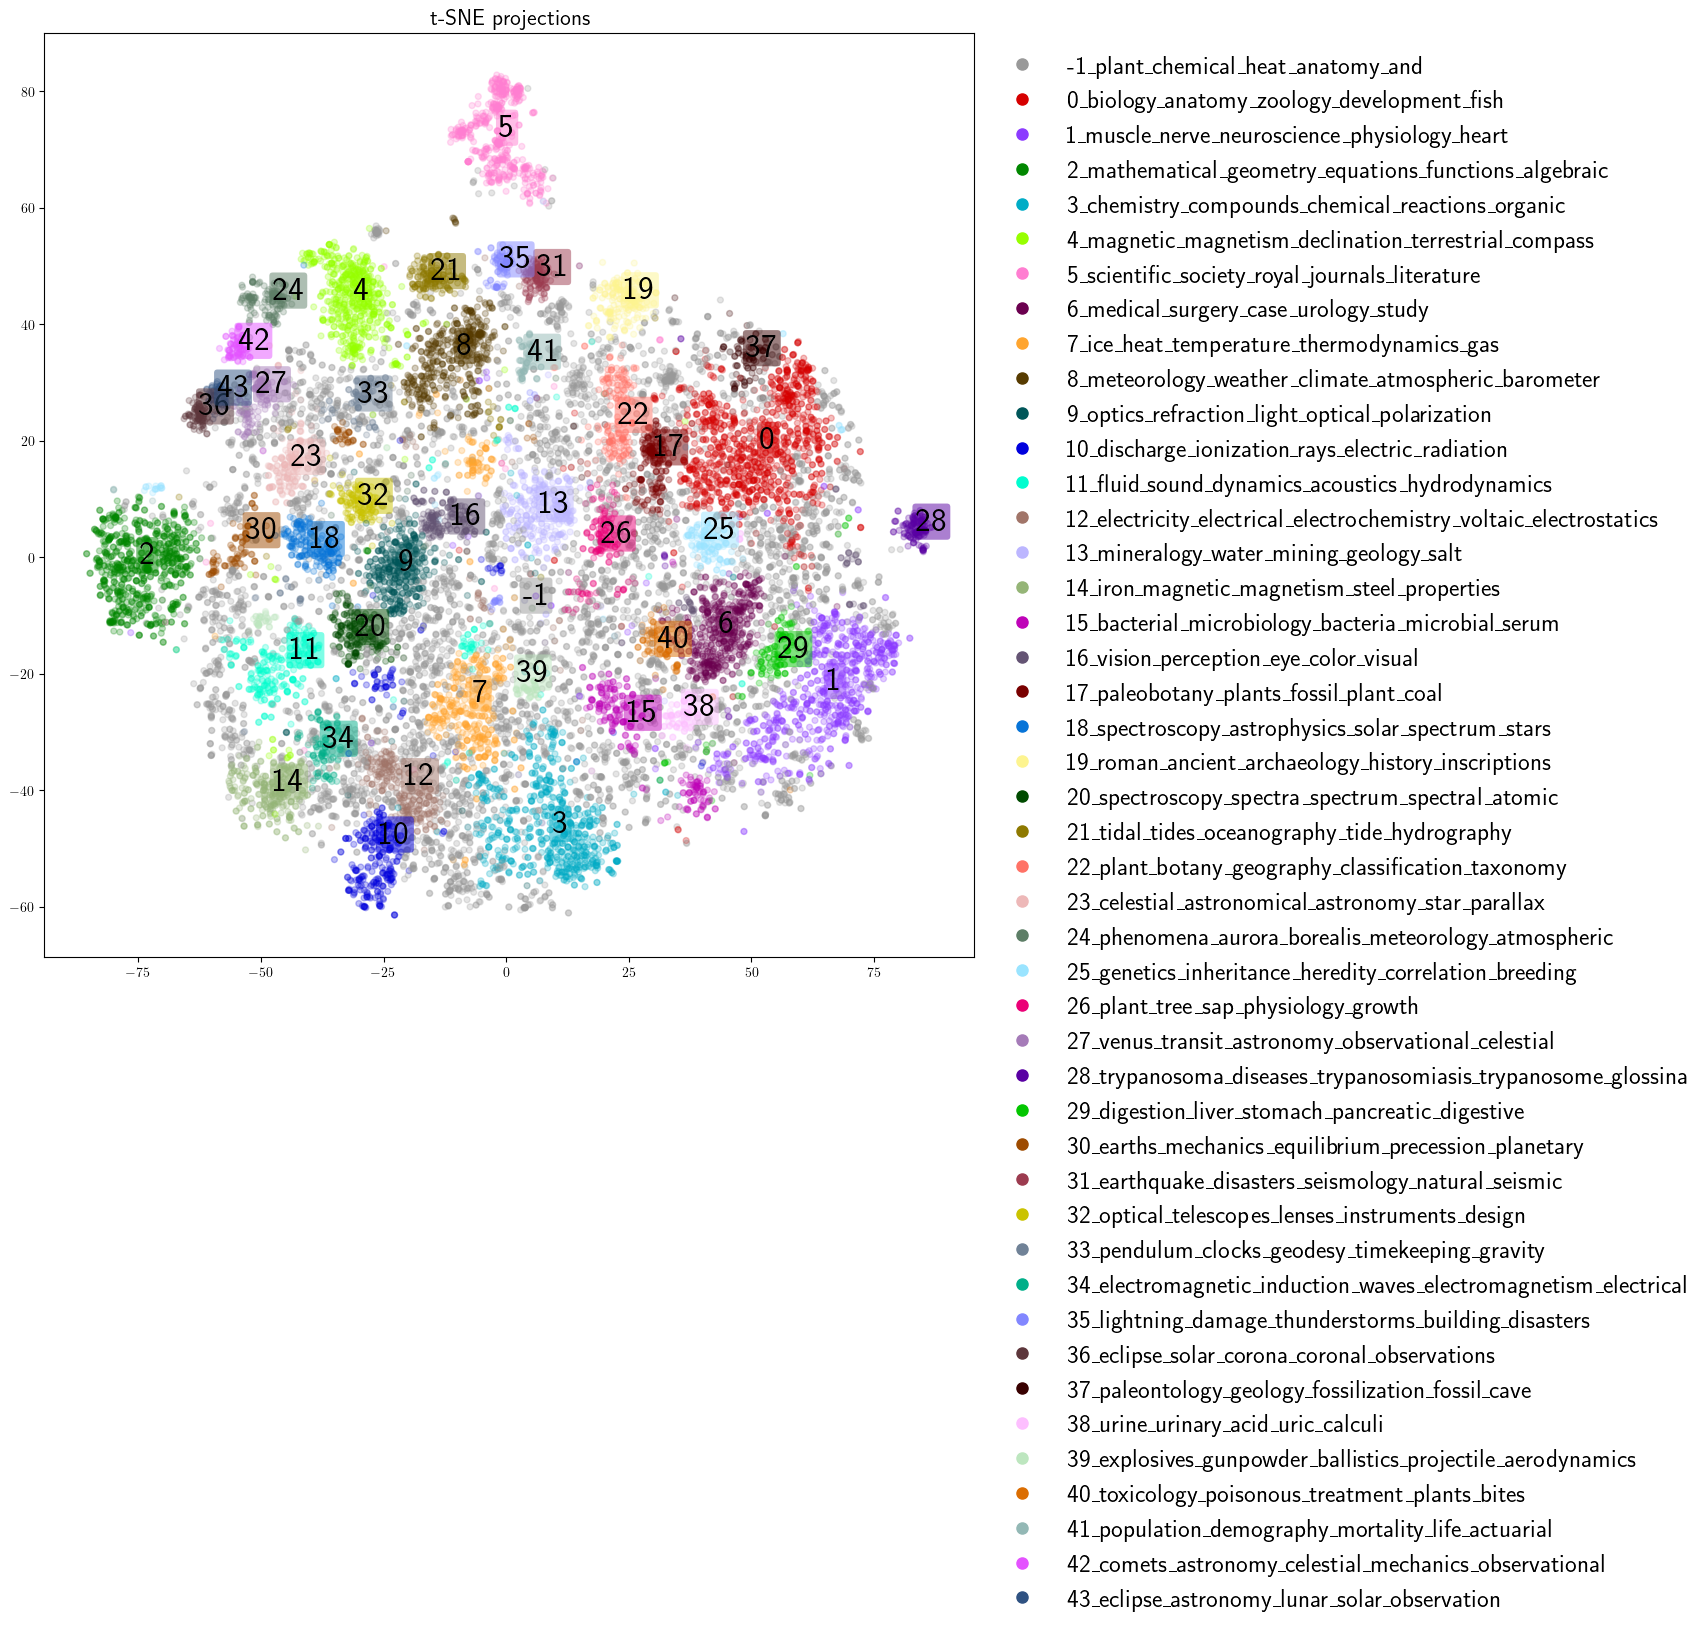

In [107]:
plot_embedding_2D(tsne_embeddings, topics, with_captions=True) 

In [132]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6250,-1_anatomy_chemical_of_chemistry,"[anatomy, chemical, of, chemistry, astronomy, ...",[Carbonic Acid Determination Gas Analysis Atmo...
1,0,1365,0_electrical_electricity_magnetic_electric,"[electrical, electricity, magnetic, electric, ...",[Magnetism Electrical Currents Iron Magnetic I...
2,1,826,1_nerve_muscle_neuroscience_neuroanatomy,"[nerve, muscle, neuroscience, neuroanatomy, sy...",[Neuroscience Physiology Animal Physiology Ner...
3,2,801,2_mathematical_geometry_equations_functions,"[mathematical, geometry, equations, functions,...",[Integral Calculus Mathematical Analysis Funct...
4,3,682,3_medical_surgery_treatment_case,"[medical, surgery, treatment, case, medicine, ...",[Surgery Wound Healing Intestinal Injuries Med...
5,4,571,4_chemistry_organic_compounds_reactions,"[chemistry, organic, compounds, reactions, che...",[Organo-Metallic Compounds Organic Acids Nitro...
6,5,520,5_magnetic_magnetism_declination_terrestrial,"[magnetic, magnetism, declination, terrestrial...",[Magnetism Magnetic Variation Geophysics Magne...
7,6,472,6_heat_thermodynamics_thermal_ice,"[heat, thermodynamics, thermal, ice, transfer,...",[Heat Transfer Thermal Engineering Heat Measur...
8,7,408,7_meteorology_weather_climate_atmospheric,"[meteorology, weather, climate, atmospheric, b...",[Meteorology Barometer Weather Observations Cl...
9,8,388,8_insect_behavior_biology_marine,"[insect, behavior, biology, marine, zoology, n...",[Entomology Insect Behavior Natural History In...


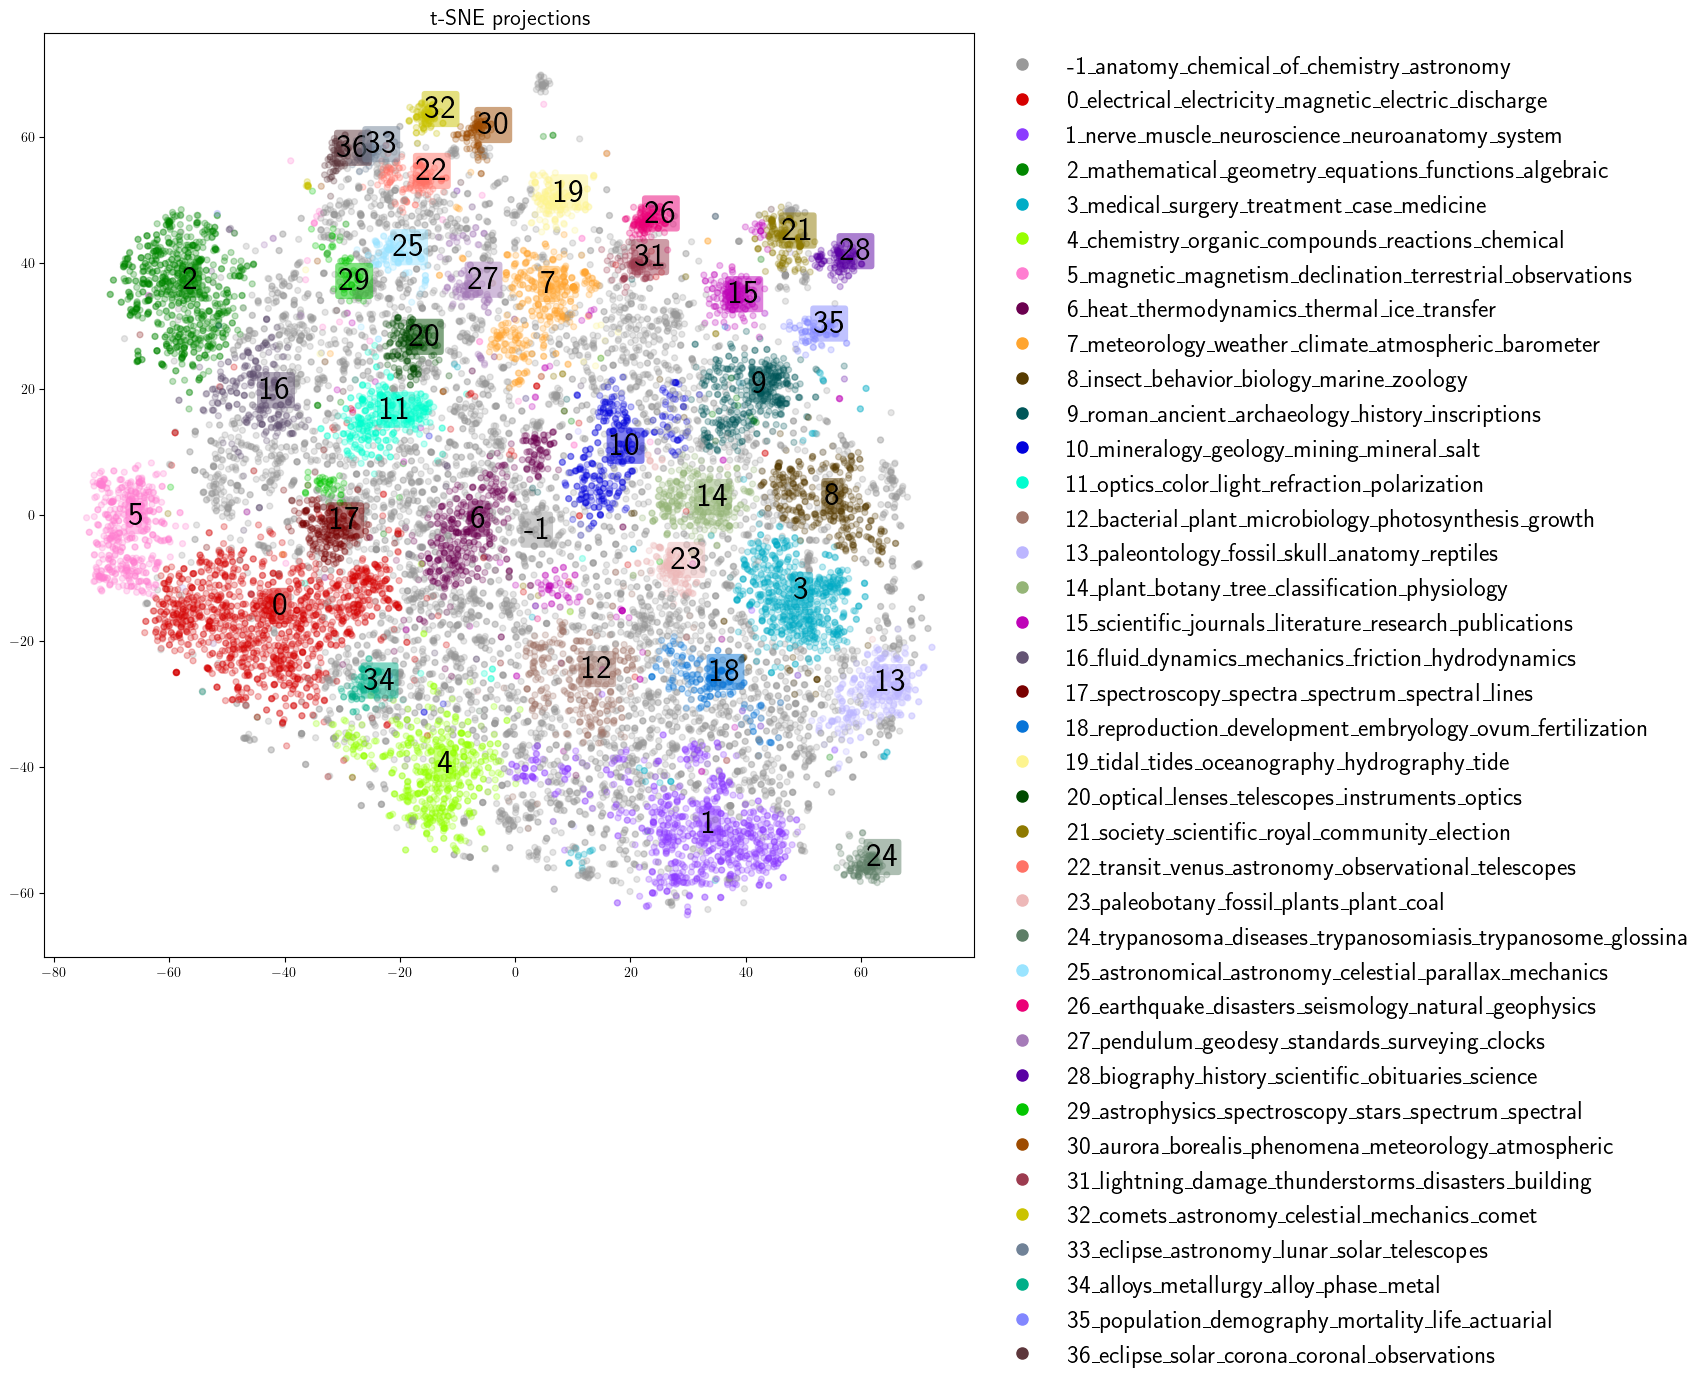

In [136]:
plot_embedding_2D(tsne_embeddings_8k,
    topics_8k,
    with_captions=True
) 